In [13]:
import sugar_analysis as sa
import sncosmo
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc, rcParams
import numpy as np
import cPickle as pkl
rcParams['font.size'] = 20.
font = {'family': 'normal', 'size': 20}
rc('axes', linewidth=3)
rc('legend', fontsize=25)
rc('xtick.major', size=5, width=3)
rc('ytick.major', size=5, width=3)
rc('xtick.minor', size=5, width=5)
rc('ytick.minor', size=5, width=5)

# CSP Light curves residuals 

In [21]:
sa.register_SUGAR()
dic =  pkl.load(open('../../sugar_analysis_data/resfitlc_csp_sugar.pkl'))
dic_res  = dic['data']
fit_fail = []
dic_del = {}
for sn_name in dic_res.keys():
    if dic_res[sn_name]['res'] != 'fit fail':
        dic_del[sn_name] = dic_res[sn_name]
    else:
        fit_fail.append(sn_name)
dic_res = dic_del 
source = sncosmo.get_source('sugar')
dust = sncosmo.CCM89Dust()
model = sncosmo.Model(source=source, 
                  effects=[dust], 
                  effect_names=['mw'], 
                  effect_frames=['obs']) 
csp_sys = sncosmo.get_magsystem('csp')
residue = {}
results_sugar = { 'cspi' : {},
                   'cspr' : {},
                   'cspv' : {},
                   'cspg' : {},
                   'cspb' : {}}

phase = np.linspace(-12,52,nb_bin_phase)
for band in results_sugar.keys():
    for i in range(len(phase)-1):
        results_sugar[band][str(phase[i])+'_'+str(phase[i+1])] = []
        results_sugar[band]['err'+str(phase[i])+'_'+str(phase[i+1])] = []
        
for sn_name in dic_res.keys():
    tmax = float(dic_res[sn_name]['res']['parameters'][1])
    model.set(z=float(dic_res[sn_name]['res']['parameters'][0]))
    model.set(t0 = tmax)
    model.set(Xgr = float(dic_res[sn_name]['res']['parameters'][2]))
    model.set(q1 = float(dic_res[sn_name]['res']['parameters'][3]))
    model.set(q2 = float(dic_res[sn_name]['res']['parameters'][4]))
    model.set(q3 = float(dic_res[sn_name]['res']['parameters'][5]))
    model.set(A = float(dic_res[sn_name]['res']['parameters'][6]))
    model.set(mwebv = float(dic_res[sn_name]['res']['parameters'][7]))
    for i, band in enumerate(dic_res[sn_name]['data_table']['band']):
        time = dic_res[sn_name]['data_table']['time'][i]
        try:
            model_mag = model.bandmag(band,'csp', time)
        except:
            continue
        if time >= tmax - 12. and time <= tmax + 48. and (band in results_sugar.keys()or band in ['cspv3014','cspv9844']):
            mag = csp_sys.band_flux_to_mag(dic_res[sn_name]['data_table']['flux'][i], band)
            if band == 'cspv3014' or band == 'cspv9844':
                band = 'cspv'
            err_mag = dic_res[sn_name]['data_table']['fluxerr'][i] /dic_res[sn_name]['data_table']['flux'][i] *1.0857362047581294


            for i in range(len(phase)-1):
                if time-tmax >= phase[i] and time-tmax <=phase[i+1]:
                    results_sugar[band][str(phase[i])+'_'+str(phase[i+1])].append(mag - model_mag)
                    results_sugar[band]['err'+str(phase[i])+'_'+str(phase[i+1])].append(err_mag)
                    continue


In [22]:
dic =  pkl.load(open('../../sugar_analysis_data/resfitlc_csp_salt2.pkl'))
dic_res  = dic['data']
fit_fail = []
dic_del = {}
for sn_name in dic_res.keys():
    if dic_res[sn_name]['res'] != 'fit fail':
        dic_del[sn_name] = dic_res[sn_name]
    else:
        fit_fail.append(sn_name)
dic_res = dic_del 
source = sncosmo.get_source('salt2')
dust = sncosmo.CCM89Dust()
model = sncosmo.Model(source=source, 
                  effects=[dust], 
                  effect_names=['mw'], 
                  effect_frames=['obs']) 
csp_sys = sncosmo.get_magsystem('csp')
residue = {}
results_salt2 = { 'cspg' : {},
                   'cspr' : {},
                   'cspi' : {},
                   'cspb' : {},
                   'cspv' : {}}

phase = np.linspace(-12,52,nb_bin_phase)
for band in results_salt2.keys():
    for i in range(len(phase)-1):
        results_salt2[band][str(phase[i])+'_'+str(phase[i+1])] = []
        results_salt2[band]['err'+str(phase[i])+'_'+str(phase[i+1])] = []            
for sn_name in dic_res.keys():
    tmax = float(dic_res[sn_name]['res']['parameters'][1])
    model.set(z=float(dic_res[sn_name]['res']['parameters'][0]))
    model.set(t0 = tmax)
    model.set(x0 = float(dic_res[sn_name]['res']['parameters'][2]))
    model.set(x1 = float(dic_res[sn_name]['res']['parameters'][3]))
    model.set(c = float(dic_res[sn_name]['res']['parameters'][4]))
    model.set(mwebv = float(dic_res[sn_name]['res']['parameters'][5]))
    
    for i, band in enumerate(dic_res[sn_name]['data_table']['band']):
        time = dic_res[sn_name]['data_table']['time'][i]
        try:
            model_mag = model.bandmag(band,'csp', time)
        except:
            continue
        if time >= tmax - 12. and time <= tmax + 48. and (band in results_salt2.keys() or band in ['cspv3014','cspv9844']):
            mag = csp_sys.band_flux_to_mag(dic_res[sn_name]['data_table']['flux'][i], band)
            if band == 'cspv3014' or band == 'cspv9844':
                band = 'cspv'

            err_mag = dic_res[sn_name]['data_table']['fluxerr'][i] /dic_res[sn_name]['data_table']['flux'][i] *1.0857362047581294

            
            for i in range(len(phase)-1):
                if time-tmax >= phase[i] and time-tmax <=phase[i+1]:
                    results_salt2[band][str(phase[i])+'_'+str(phase[i+1])].append(mag - model_mag)
                    results_salt2[band]['err'+str(phase[i])+'_'+str(phase[i+1])].append(err_mag)
                    continue

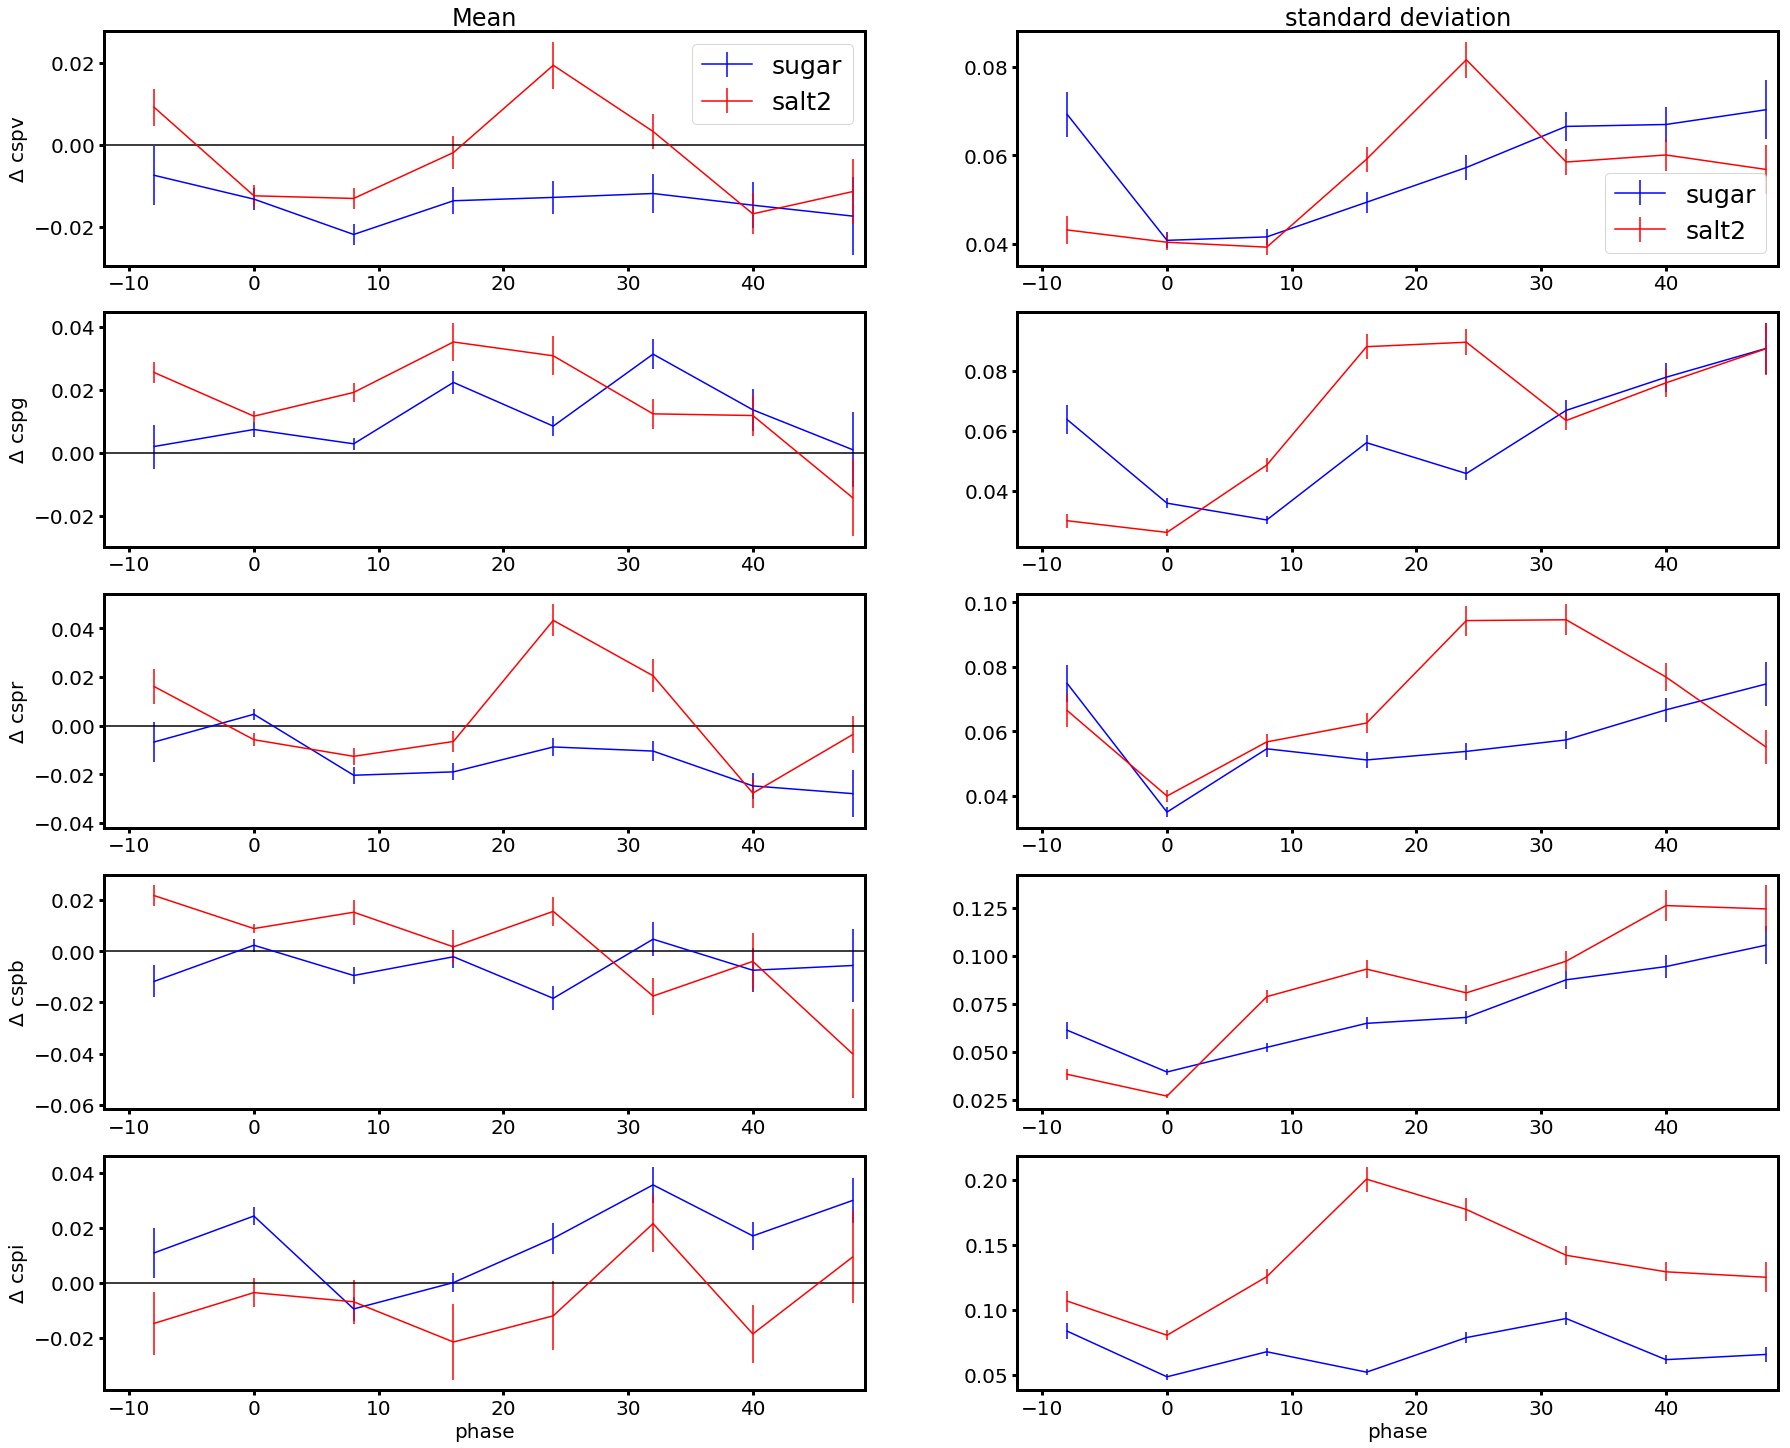

In [31]:
nb_bin_phase = 9
plt.figure(figsize=(30, 25))
mean_salt2 = {}
mean_sugar = {}
std_salt2 = {}
std_sugar = {}
mean_err_sug = {}
mean_err_salt2 = {}
phase = np.linspace(-12,52,nb_bin_phase)

for i, band in enumerate(results_sugar.keys()):
    p = []
    mean_salt2[band] = {'mean_value':[], 'err_mean':[]}
    mean_sugar[band] = {'mean_value':[], 'err_mean':[]}
    std_salt2[band] = {'std_value':[], 'err_std':[]}
    std_sugar[band] = {'std_value':[], 'err_std':[]}
    mean_err_sug[band] = []
    mean_err_salt2[band] = []
    for j in range(len(phase)-1):
            mean_err_salt2[band].append(np.mean(results_salt2[band]['err'+str(phase[j])+'_'+str(phase[j+1])]))
            mean_salt2[band]['mean_value'].append(np.mean(results_salt2[band][str(phase[j])+'_'+str(phase[j+1])]))
            std_salt2[band]['std_value'].append(np.std(results_salt2[band][str(phase[j])+'_'+str(phase[j+1])]))
            mean_salt2[band]['err_mean'].append(np.std(results_salt2[band][str(phase[j])+'_'+str(phase[j+1])])/np.sqrt(len(results_salt2[band][str(phase[j])+'_'+str(phase[j+1])])-1))
            std_salt2[band]['err_std'].append(np.std(results_salt2[band][str(phase[j])+'_'+str(phase[j+1])])/np.sqrt(2*len(results_salt2[band][str(phase[j])+'_'+str(phase[j+1])])))
    for j in range(len(phase)-1):
            mean_err_sug[band].append(np.mean(results_sugar[band]['err'+str(phase[j])+'_'+str(phase[j+1])]))
            mean_sugar[band]['mean_value'].append(np.mean(results_sugar[band][str(phase[j])+'_'+str(phase[j+1])]))
            std_sugar[band]['std_value'].append(np.std(results_sugar[band][str(phase[j])+'_'+str(phase[j+1])]))
            mean_sugar[band]['err_mean'].append(np.std(results_sugar[band][str(phase[j])+'_'+str(phase[j+1])])/np.sqrt(len(results_sugar[band][str(phase[j])+'_'+str(phase[j+1])])-1))
            std_sugar[band]['err_std'].append(np.std(results_sugar[band][str(phase[j])+'_'+str(phase[j+1])])/np.sqrt(2*len(results_sugar[band][str(phase[j])+'_'+str(phase[j+1])])))
            p.append((phase[j+1]+phase[j])/2)
    
    plt.subplot(len(results_sugar.keys()), 2, 2*i+1)

    plt.errorbar(p, mean_sugar[band]['mean_value'], yerr=mean_sugar[band]['err_mean'],color='b', label='sugar')
    plt.errorbar(p, mean_salt2[band]['mean_value'], yerr=mean_salt2[band]['err_mean'],color='r', label='salt2')
    plt.plot([-15.,50.],[0.,0.], color='black')
    plt.ylabel('$\Delta$ '+band)
    plt.xlim(-12,49)
    if i == 0:
        plt.legend()    
        plt.title('Mean')
    if i == len(results_sugar.keys())-1:
        plt.xlabel('phase')

    plt.subplot(len(results_sugar.keys()), 2, 2*(i+1))
    plt.errorbar(p, std_sugar[band]['std_value'], yerr=std_sugar[band]['err_std'], color='b', label='sugar')
    plt.errorbar(p, std_salt2[band]['std_value'], yerr=std_salt2[band]['err_std'], color='r', label='salt2')
    plt.xlim(-12,49)
    if i == 0:
        plt.legend() 
        plt.title('standard deviation')
    if i == len(results_sugar.keys())-1:
        plt.xlabel('phase')
result_path = '../../sugar_analysis_data/results/save_plot/csp/residue_LC/'
pdffile = result_path+'results_csp_LCresidue_phase.pdf'
plt.savefig(pdffile, bbox_inches='tight')     
plt.show()


In [51]:
model_err = []
weff = np.zeros(len(results_sugar.keys()))
for i, band in enumerate(results_sugar.keys()):
    if band == 'cspv':
        weff[i] = 5388.417 #mean cspv9844 and cspv3014
    else:
        b = sncosmo.get_bandpass(band)
        weff[i] = b.wave_eff    
    model_err.append(np.sqrt(np.array(std_sugar[band]['std_value'])**2-np.array(mean_err_sug[band])**2))

model_err = np.array(model_err)
argso = np.argsort(weff)
weff = weff[argso]
model_err = model_err[argso]
outfile = open('../../sugar_analysis_data/model_err_sug.txt', 'w')

for i in range(len(p)):
    for j, wf in enumerate(weff):
        outfile.write('%f %f %f \n'%(p[i], wf, model_err[j][i]))
        
outfile.close()